In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def convolution(image,kernel):
    img=image.copy()
    img=img.astype(np.float64)
    kernel= kernel.astype(np.float64)
    output_img = np.zeros(img.shape)
    for i in range(int(kernel.shape[0]/2),image.shape[0]-int((kernel.shape[0]-1)/2)):
        for j in range(int(kernel.shape[1]/2),image.shape[1]-int((kernel.shape[1]-1)/2)):
            output_img[i][j]=sum(sum(kernel* img[i-int(kernel.shape[0]/2) : i+1+int((kernel.shape[0]-1)/2),j-int(kernel.shape[1]/2):j+1+int((kernel.shape[1]-1)/2)]))
            #checking bounds
            output_img[i][j] = min(255,output_img[i][j])
            output_img[i][j] = max(0,output_img[i][j])
    output_img = output_img.astype(np.uint8)
    return output_img

In [3]:
def gaussfilter(image,sigma,size):
    img=image.copy()
    n = size // 2
    values = np.zeros((size, size), dtype=tuple)
    for x in range(0, 2*n+1):
      for y in range(0, 2*n+1):
        values[x,y] = (x-n,y-n)
    kernel = np.zeros((size, size))
    for r in range(size):
        for c in range(size):
              x,y = values[r][c] 
              kernel[r][c] = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2* sigma**2))
    outputimg=convolution(img,kernel)
    return outputimg
                     

In [4]:
def adaptivethreshold(image,valmax,k,x):
  img=image.copy()
  img_op = img.copy()
  n = k//2
  padimg = np.pad(img, ((n,n),(n,n)) , mode='constant')

  for r in range(img.shape[0]):
    for c in range(img.shape[1]):
      if img[r][c] <= np.mean(padimg[r:r+k,c:c+k])-x:
            img_op[r][c]=0
      else:
        img_op[r][c]=valmax
        
  return img_op

In [5]:
def bilateral_filter(image, sigmad, sigmar, size):
    sz=size
    n = size//2
    img=image.copy()
    img = img.astype(np.float64)
    gaussian_kernel = np.zeros((size,size))
    output_img = np.zeros(img.shape)
    for i in range(size):
        for j in range(size):
                gaussian_kernel[i][j]=np.exp(-(((i-n)**2)+((j-n)**2))/(2*(sigmad**2)))
    for i in range(n,img.shape[0]-n):
        for j in range(n,img.shape[1]-n):
            for k in range(3):
                sub = img[i-n:i+n+1,j-n:j+n+1,k:k+1].reshape(size,-1)
                sc = sub-img[i][j][k]
                rc = np.exp(-((sc*sc)/(2*sigmar*sigmar)))
                kernel = gaussian_kernel*rc
                output_img[i][j][k] = (sum(sum(sub*kernel)))/sum(sum(kernel))
    return output_img.astype('uint8')

Text(0.5, 1.0, 'original image')

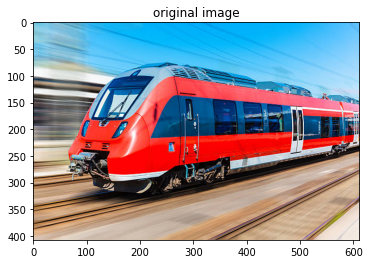

In [6]:
img = cv2.imread('../images/train.jpeg',cv2.IMREAD_UNCHANGED)
img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('original image')

Text(0.5, 1.0, 'bilateral filtered image')

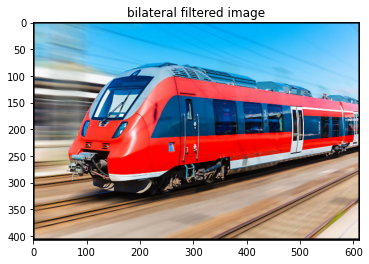

In [7]:
img2 = bilateral_filter(img,1,45,7)
plt.imshow(img2)
plt.title('bilateral filtered image')

Text(0.5, 1.0, 'grayscale image')

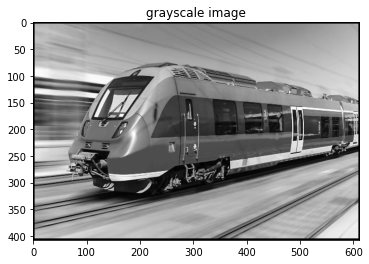

In [8]:
img3=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img3,cmap='gray')
plt.title('grayscale image')

Text(0.5, 1.0, 'gaussfiltered image')

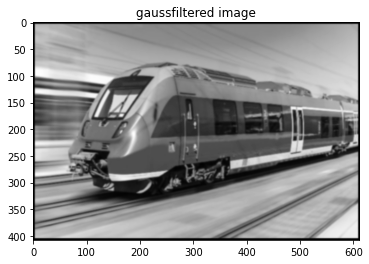

In [9]:
img4 = gaussfilter(img3,1.2,7)
plt.imshow(img4,cmap='gray')
plt.title('gaussfiltered image')

Text(0.5, 1.0, 'edge mask')

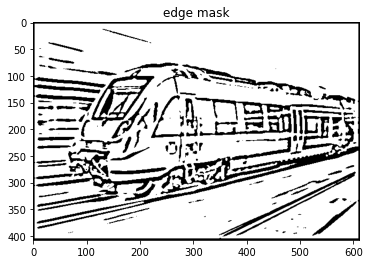

In [10]:
img5 = adaptivethreshold(img4, 250 , 15 , 9)
plt.imshow(img5,cmap='gray')
plt.title('edge mask')

Text(0.5, 1.0, 'cartoon image')

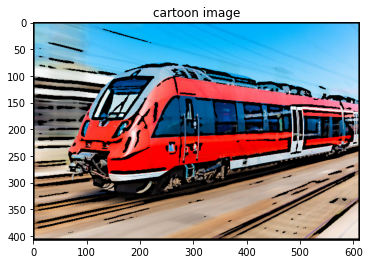

In [11]:
img6 = np.copy(img)
for r in range(img.shape[0]):
    for c in range(img.shape[1]):
      if img5[r][c] == 0:img6[r][c]=[0,0,0]
      else:
        img6[r][c]=img2[r][c]
plt.imshow(img6)     
plt.title('cartoon image')

Text(0.5, 1.0, 'original image')

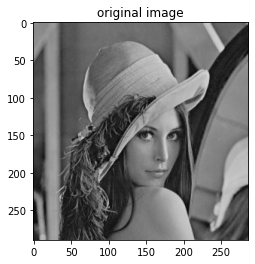

In [12]:
img = cv2.imread('../images/lena.jpg',cv2.IMREAD_UNCHANGED)
img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('original image')

Text(0.5, 1.0, 'bilateral filtered image')

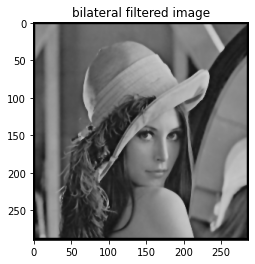

In [13]:
img2 = bilateral_filter(img,1,45,7)
plt.imshow(img2)
plt.title('bilateral filtered image')

Text(0.5, 1.0, 'grayscale image')

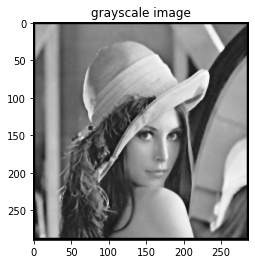

In [14]:
img3=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img3,cmap='gray')
plt.title('grayscale image')

Text(0.5, 1.0, 'gaussfiltered image')

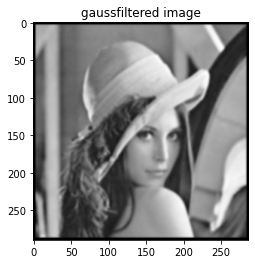

In [15]:
img4 = gaussfilter(img3,1.2,7)
plt.imshow(img4,cmap='gray')
plt.title('gaussfiltered image')

Text(0.5, 1.0, 'edge mask')

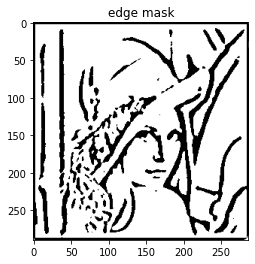

In [16]:
img5 = adaptivethreshold(img4, 250 , 15 , 9)
plt.imshow(img5,cmap='gray')
plt.title('edge mask')

Text(0.5, 1.0, 'cartoon image')

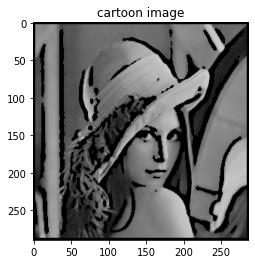

In [17]:
img6 = np.copy(img)
for r in range(img.shape[0]):
    for c in range(img.shape[1]):
      if img5[r][c] == 0:img6[r][c]=[0,0,0]
      else:
        img6[r][c]=img2[r][c]
plt.imshow(img6)     
plt.title('cartoon image')